In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')
sample_submission_df = pd.read_csv('./data/sample_submission.csv')

## 데이터프레임에서 id 값을 제거

axis=0 + labels 는 index인수와 역할이 같고 axis=1 + labels는 columns와 역할이 같다.

In [3]:
train_df1 = train_df.drop(columns=['id','Gender'])
train_df1

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...
1248,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


In [4]:
train_df2 = train_df.drop(labels=['id'],axis=1)
train_df2

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...,...
1248,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,I,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,F,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,F,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


In [5]:
train_df = train_df.drop(columns='id')

## Target값 분석

In [6]:
train_df['Target']

0       15
1        8
2       18
3       13
4        6
        ..
1248     4
1249     7
1250     7
1251     6
1252    11
Name: Target, Length: 1253, dtype: int64

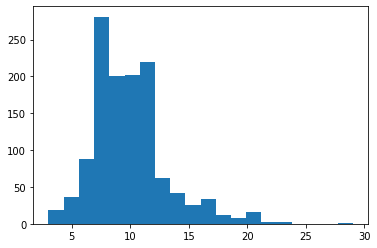

In [7]:
plt.hist(train_df['Target'], bins=20)
plt.show()

In [8]:
train_df.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

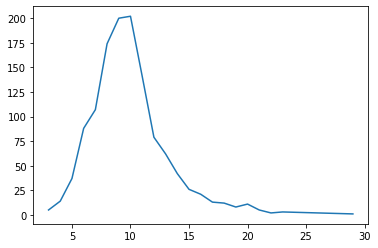

In [9]:
plt.plot(train_df.groupby('Target').count().iloc[:,0])
plt.show()

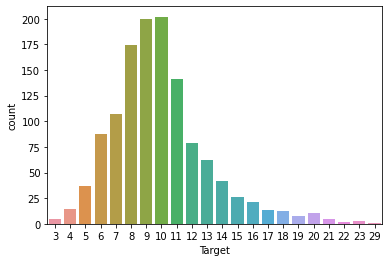

In [10]:
sns.countplot(train_df['Target'])
plt.show()

## Gender값 분석

In [11]:
train_df.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

In [12]:
train_df.groupby('Gender').count().iloc[:,0].index

Index(['F', 'I', 'M'], dtype='object', name='Gender')

In [13]:
train_df.groupby('Gender').count().iloc[:,0].values

array([380, 404, 469], dtype=int64)

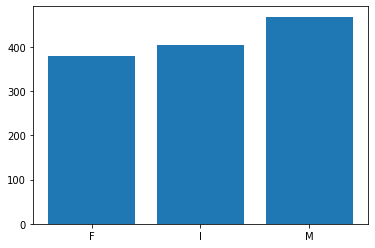

In [14]:
x = train_df.groupby('Gender').count().iloc[:,0].index
y = train_df.groupby('Gender').count().iloc[:,0].values
plt.bar(x,y)
plt.show()

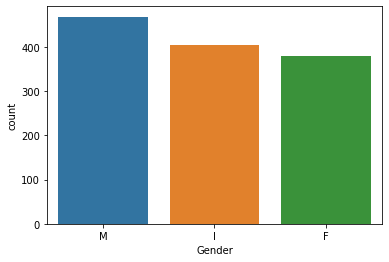

In [15]:
sns.countplot(train_df['Gender'])
plt.show()

## Gender값 Label Encoding

In [16]:
train_df['Gender'].replace(to_replace=['F','I','M'],value=[1,2,3])

0       3
1       2
2       2
3       3
4       2
       ..
1248    2
1249    2
1250    1
1251    1
1252    1
Name: Gender, Length: 1253, dtype: int64

In [17]:
train_df['Gender'].replace(to_replace={'F':1,'I':2,'M':3})

0       3
1       2
2       2
3       3
4       2
       ..
1248    2
1249    2
1250    1
1251    1
1252    1
Name: Gender, Length: 1253, dtype: int64

In [18]:
train_df['Gender'].unique()

array(['M', 'I', 'F'], dtype=object)

In [19]:
print(train_df.dtypes)
print(train_df['Gender'].dtypes)

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object
object


In [20]:
def label_encode(df):
    for i in df.columns:
        if df[i].dtypes == "object":
            label_map = {}
            for j,k in enumerate(df[i].unique()):
                label_map[k] = j+1
            df[i] = df[i].replace(to_replace=label_map)

In [21]:
label_encode(train_df)
train_df

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...,...
1248,2,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,2,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,3,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,3,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


## Gender값 OneHot Encoding